<a href="https://colab.research.google.com/github/Nouran-Khallaf/Samer_Compare/blob/main/Copy_of_Samer_VS_CEFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load Data
  Both Samer and our list are analysed first with MadaMira and using lemma to compare

In [5]:
DataSet_1 = pd.read_csv('/content/Samer.csv')
DataSet_2 = pd.read_excel('/content/Our_List_numbered.xlsx')
Samer = DataSet_1[["lemma", "readability"]]
CEFR = DataSet_2[["lemma","Levels"]]

Merge both list depending on matching both lemma and pos at the sametime.

In [6]:
MergedList = DataSet_1.merge( DataSet_2,  how='left', left_on=['lemma','pos'], right_on = ['lemma','pos'], indicator=True)
MergedList.to_csv('mergedList.csv')

Display the merged list:

In [ ]:
MergedList

,Word,pos,readability,lemma,diac_x,Levels,diac_y,_merge
0,فِي,prep,1,فِي_1,فِي,1.0,فِي,both
1,مِن,prep,1,مِن_1,مِن,5.0,فَمِنهُم,both
2,مِن,prep,1,مِن_1,مِن,1.0,مِن,both
3,مِن,prep,1,مِن_1,مِن,5.0,مِمّا,both
4,أَنَّ,conj_sub,2,أَنَّ_1,أَنَّ,4.0,أَنِّي,both
...,...,...,...,...,...,...,...,...
28341,وَفَّد,verb,5,وَفْد_1,وَفْدٌ,NaN,NaN,left_only
28342,وَقْفِيَّة,noun,5,وَقْفِيّ_1,وَقْفِيَّةً,NaN,NaN,left_only
28343,وَلَّه,verb,5,لِ-_1,وَلَهُ,NaN,NaN,left_only
28344,وَهَّل,verb,5,هَلْ_1,وَهَلْ,NaN,NaN,left_only


Select only the lemmas appeared in both lists -->8700 lemma

In [7]:
MergedList.loc[MergedList['_merge'] == 'both']

,Word,pos,readability,lemma,diac_x,Levels,diac_y,_merge
0,فِي,prep,1,فِي_1,فِي,1.0,فِي,both
1,مِن,prep,1,مِن_1,مِن,5.0,فَمِنهُم,both
2,مِن,prep,1,مِن_1,مِن,1.0,مِن,both
3,مِن,prep,1,مِن_1,مِن,5.0,مِمّا,both
4,أَنَّ,conj_sub,2,أَنَّ_1,أَنَّ,4.0,أَنِّي,both
...,...,...,...,...,...,...,...,...
28291,مُقَنَّع,adj,3,مُقْنِع_1,مُقْنِعٍ,4.0,مُقْنِعٍ,both
28319,نُدُوَّة,noun,5,نَدْوَة_1,نَدْوَةً,5.0,نَدْوَةَ,both
28326,نَكَه,verb,5,وَكَى-ِ_1,نَكِهِ,5.0,أُوكَى,both
28334,وَرَّد,verb,4,رَدّ-ُ_1,وَرَدَّ,3.0,تَرُدُّ,both


Select the lemmas that only appeared in Samer List---> 19646 lemma

In [8]:
MergedList.loc[MergedList['_merge'] == 'left_only']

,Word,pos,readability,lemma,diac_x,Levels,diac_y,_merge
28,لا,part_neg,1,لا_1,لا,NaN,NaN,left_only
55,إِنَّ,verb_pseudo,3,إِنْ_1,إِنْ,NaN,NaN,left_only
58,رَأَى,verb,1,رَأْي_1,رَأْيِ,NaN,NaN,left_only
65,لٰكِنَّ,verb_pseudo,2,لٰكِنَّ_1,لٰكِنَّ,NaN,NaN,left_only
98,إِلّا,part_restrict,1,إِلّا_2,إِلّا,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
28340,وَظِيفِيَّة,noun,4,وَظِيفِيَّة_1,وَظِيفِيَّةَ,NaN,NaN,left_only
28341,وَفَّد,verb,5,وَفْد_1,وَفْدٌ,NaN,NaN,left_only
28342,وَقْفِيَّة,noun,5,وَقْفِيّ_1,وَقْفِيَّةً,NaN,NaN,left_only
28343,وَلَّه,verb,5,لِ-_1,وَلَهُ,NaN,NaN,left_only


Select the matched lemmas with same assigned level in both lists --> 1996 lemma

In [9]:
FullShared =MergedList.loc[MergedList['_merge'] == 'both']
FullShared.loc[FullShared['readability']== FullShared['Levels']]

,Word,pos,readability,lemma,diac_x,Levels,diac_y,_merge
0,فِي,prep,1,فِي_1,فِي,1.0,فِي,both
2,مِن,prep,1,مِن_1,مِن,1.0,مِن,both
13,عَلَى,prep,1,عَلَى_1,عَلَى,1.0,عَلَى,both
14,عَلَى,prep,1,عَلَى_1,عَلَى,1.0,عَلَيكُم,both
15,إِلَى,prep,1,إِلَى_1,إِلَى,1.0,إِلَى,both
...,...,...,...,...,...,...,...,...
28063,تَنَشَّط,verb,3,نَشِط-َ_1,تَنْشَطُ,3.0,أَنْشَطَ,both
28178,عَثَّر,verb,4,عَثَر-ُ_1,عُثِرَ,4.0,عُثِرَ,both
28319,نُدُوَّة,noun,5,نَدْوَة_1,نَدْوَةً,5.0,نَدْوَةَ,both
28326,نَكَه,verb,5,وَكَى-ِ_1,نَكِهِ,5.0,أُوكَى,both


Select the other 6704 lemma with different readability levels

In [10]:
NotShared =MergedList.loc[MergedList['_merge'] == 'both']
NotShared.loc[NotShared['readability']!= NotShared['Levels']]

,Word,pos,readability,lemma,diac_x,Levels,diac_y,_merge
1,مِن,prep,1,مِن_1,مِن,5.0,فَمِنهُم,both
3,مِن,prep,1,مِن_1,مِن,5.0,مِمّا,both
4,أَنَّ,conj_sub,2,أَنَّ_1,أَنَّ,4.0,أَنِّي,both
5,أَنَّ,conj_sub,2,أَنَّ_1,أَنَّ,1.0,لِأَنِّي,both
6,أَنَّ,conj_sub,2,أَنَّ_1,أَنَّ,1.0,لِأَنَّكَ,both
...,...,...,...,...,...,...,...,...
28234,مُؤَمَّن,adj,4,مُؤْمِن_1,مُؤْمِنٍ,5.0,مُؤْمِنٍ,both
28246,مُتَطَلِّب,adj,4,مُتَطَلَّب_1,مُتَطَلَّبٍ,3.0,مُتَطَلَّبٍ,both
28288,مُغَنَّى,noun,3,مُغَنِّي_1,مُغَنِّي,5.0,مُغَنٍّ,both
28291,مُقَنَّع,adj,3,مُقْنِع_1,مُقْنِعٍ,4.0,مُقْنِعٍ,both


Select and sort a subset of the NotShared data with only the readability and levles to compare

In [11]:
NotShared = NotShared.loc[NotShared['readability']!= NotShared['Levels']]
Data = NotShared[['readability','Levels']]
Data =Data.sort_values(by=['readability', 'Levels'])

counting how many times each difference between the lists have been repeated

In [12]:
c = Counter(list(zip(Data.readability, Data.Levels.astype(int))))
c

Counter({(1, 2): 359,
         (1, 3): 589,
         (1, 4): 441,
         (1, 5): 395,
         (2, 1): 148,
         (2, 3): 310,
         (2, 4): 353,
         (2, 5): 369,
         (3, 1): 135,
         (3, 2): 217,
         (3, 4): 403,
         (3, 5): 785,
         (4, 1): 113,
         (4, 2): 155,
         (4, 3): 299,
         (4, 5): 1014,
         (5, 1): 96,
         (5, 2): 117,
         (5, 3): 193,
         (5, 4): 213})

In [13]:
### converting the previous counter into a dataFrame to start visualisation and analysis
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df.columns = ['Data','Count']
df

,Data,Count
0,"(1, 2)",359
1,"(1, 3)",589
2,"(1, 4)",441
3,"(1, 5)",395
4,"(2, 1)",148
5,"(2, 3)",310
6,"(2, 4)",353
7,"(2, 5)",369
8,"(3, 1)",135
9,"(3, 2)",217


ploting the whole counter in one graph

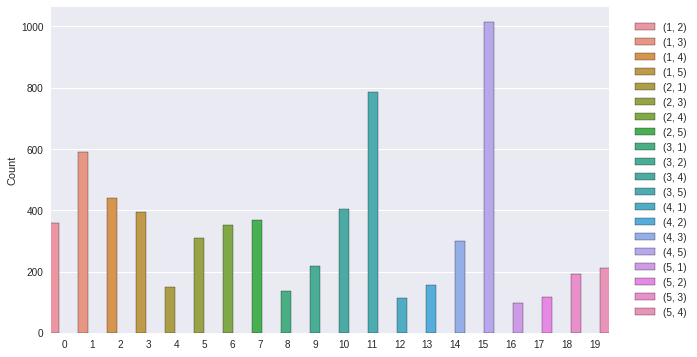

In [ ]:
# plt styling parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.rcParams["patch.force_edgecolor"] = True

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(df))
fig, ax = plt.subplots()
# plot
p = sns.barplot(x=df.index, y='Count', data=df, hue='Data')

# place the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

In [14]:
#### adding a new column represnting the main level for each difference so we can visual each diffeence alone
column = ['A1','A1','A1','A1','A2','A2','A2','A2','B1','B1','B1','B1','B2','B2','B2','B2','C1','C1','C1','C1']
len(column)
df['Type'] = column
df

,Data,Count,Type
0,"(1, 2)",359,A1
1,"(1, 3)",589,A1
2,"(1, 4)",441,A1
3,"(1, 5)",395,A1
4,"(2, 1)",148,A2
5,"(2, 3)",310,A2
6,"(2, 4)",353,A2
7,"(2, 5)",369,A2
8,"(3, 1)",135,B1
9,"(3, 2)",217,B1


ploting each level on its own figure.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/style.py:64: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


Text(0.5, 1.0, 'C=5')

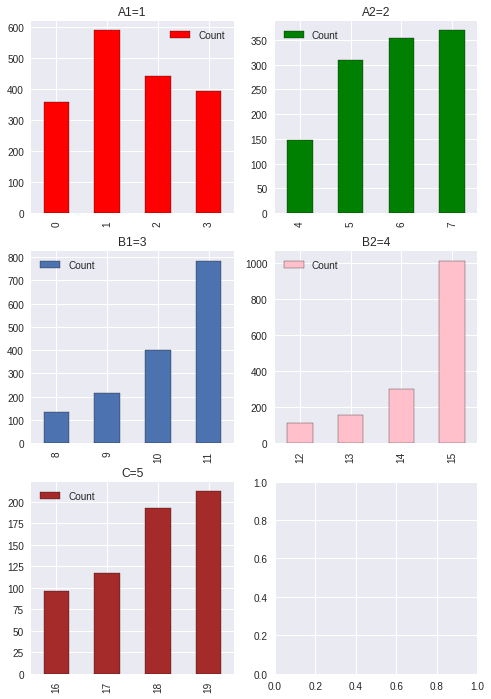

In [ ]:
 fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
 df.loc[df['Type']== 'A1'].plot(kind='bar',ax=axes[0,0],color='red'); axes[0,0].set_title('A1=1')
 df.loc[df['Type']== 'A2'].plot(kind='bar',ax=axes[0,1],color='Green'); axes[0,1].set_title('A2=2')
 df.loc[df['Type']== 'B1'].plot(kind='bar',ax=axes[1,0]); axes[1,0].set_title('B1=3') 
 df.loc[df['Type']== 'B2'].plot(kind='bar',ax=axes[1,1],color='Pink'); axes[1,1].set_title('B2=4')
 df.loc[df['Type']== 'C1'].plot(kind='bar',ax=axes[2,0],color='brown'); axes[2,0].set_title('C=5')

as we mainly intersted in the most difficult words in level 5, we manually analysed the 96 words that assigned with level 5 in Samer while assigned with level 1 in our list.


In [ ]:
###Generating the (5,1) 96 lemma list
List5_1 = NotShared.loc[NotShared['readability']== 5].loc[NotShared['Levels']==1]
List5_1.to_csv('5_1_list.csv')

# The manual analysis shows that:
## 1-  some of the words a rarly used and even analysed with Madamira to a most simple lemma such as:13304,بَلاد,noun,5,بَلَد_1,بِلادٍ,1.0,بَلَدٍ,both
in this example is a rare word i do not even know what does it mean and MADAMira analysed it into a word means countries which have the same orthographical form.
## 2- 14010,مُعِيد,noun,5,مُعِيد_1,مُعِيدٍ,1.0,مُعِيدٌ,both
this word means a lecturer in an university which i believe could be in lower levels as it is considered as a job.
## 3- also in : 15164,قارَة,noun,5,قارَّة_1,قارَّةَ,1.0,قارَّةٌ,both
is the same case as previous you should know the continental name.


In [ ]:
1,مِن,prep,1,مِن_1,مِن,5.0,فَمِنهُم,both
13304,بَلاد,noun,5,بَلَد_1,بِلادٍ,1.0,بَلَدٍ,both
14010,مُعِيد,noun,5,مُعِيد_1,مُعِيدٍ,1.0,مُعِيدٌ,both
15164,قارَة,noun,5,قارَّة_1,قارَّةَ,1.0,قارَّةٌ,both
9214,أَكَلّ,verb,5,أَكَل-ُ_1,أَكَلَ,1.0,يَأْكُلُ,both


just to check how many is different for each level

In [16]:
df[['Count','Type']].groupby(['Type']).sum()

,Count
Type,
A1,1784
A2,1180
B1,1540
B2,1581
C1,619


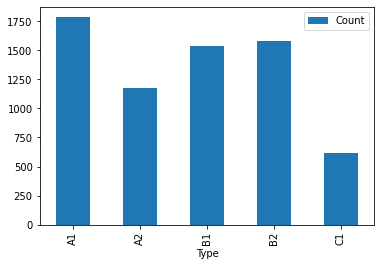

In [21]:
D_df = df[['Count','Type']].groupby(['Type']).sum()
D_df.plot(kind='bar')